In [8]:
from selenium import webdriver
import time
import re
import csv
import string



driver = webdriver.Chrome('C:/Users/KIIT/Downloads/chromedriver.exe')
yt_link = "https://www.youtube.com/watch?v=6vt3PFRC11E&list=PLdo5W4Nhv31a36XWIKtSBCeR2MEFOGsLG&index=3" #add your link here
print("-------------------------------------------------------------------------------------------------------------------")
driver.get(yt_link)
driver.maximize_window()
time.sleep(5)
title = driver.find_element_by_xpath('//*[@id="container"]/h1/yt-formatted-string').text
print("Video Title: " + title)
print("-------------------------------------------------------------------------------------------------------------------")

comment_section = driver.find_element_by_xpath('//*[@id="comments"]')
driver.execute_script("arguments[0].scrollIntoView();", comment_section)
time.sleep(7)

last_height = driver.execute_script("return document.documentElement.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(2)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")



name_elems=driver.find_elements_by_xpath('//*[@id="author-text"]')
comment_elems = driver.find_elements_by_xpath('//*[@id="content-text"]')
num_of_names = len(name_elems)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
positive=0
negative=0
neutral=0
arr=[]

for i in range(num_of_names):
    username = name_elems[i].text    # .replace(",", "|")
    comment = comment_elems[i].text    # .replace(",", "|")

        
    print(username + ": " + comment) # comment.translate({ord(i):None for i in '' if i not in string.printable})
    ss=sid.polarity_scores(comment)
    print(i)
    for k in ss:
        print(k,ss[k])
        arr.append(ss['compound'])
    if(ss['compound']>=0.05):
        print("Positive Sentiment")
        positive+=1
    elif(ss['compound']<=-0.05):
        print("negative Sentiment")
        negative+=1
    else:
        print("Neutral Sentiment")
        neutral+=1
    
    print("-------------------------------------------------------------------------------------------------------------------")

    
import matplotlib.pyplot as plt
positiv=((positive)/(positive+neutral+negative))*100
negativ=((negative)/(positive+neutral+negative))*100
neutra=((neutral)/(positive+neutral+negative))*100

labels=['Positive ['+str(positiv)+'%]','Neutral['+str(neutra)+'%]','Negative ['+str(negativ)+'%]']
sizes=[positiv,negativ,neutra]
colors=['blue','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

plt.plot(arr, label='sentiment')
plt.title('SENTIMENT ANALYSIS')
plt.ylabel('compound')
plt.xlabel('posts')

plt.show()
driver.close()

-------------------------------------------------------------------------------------------------------------------
Video Title: Binary Tree Implementation | Data Structures
-------------------------------------------------------------------------------------------------------------------
aniket pagar: Don't take me negative...
But there are so many things u need to add in code.

Like - NULL check , value is less or greater than etc...
0
neg 0.0
neu 0.755
pos 0.245
compound 0.7287
Positive Sentiment
-------------------------------------------------------------------------------------------------------------------
Saurabh Gupta: I'm shocked to see the number of views on such good content.
1
neg 0.148
neu 0.581
pos 0.271
compound 0.2263
Positive Sentiment
-------------------------------------------------------------------------------------------------------------------
Shekhar Tewari: Ma'am you are such  a blessing to the world...I've never been able to understand the tree's concept so c

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

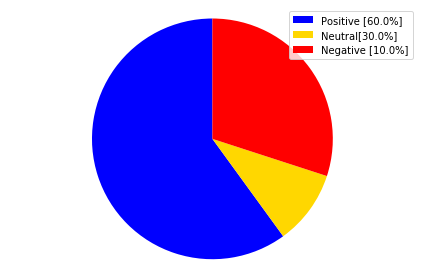

In [9]:
import matplotlib.pyplot as plt
positiv=((positive)/(positive+neutral+negative))*100
negativ=((negative)/(positive+neutral+negative))*100
neutra=((neutral)/(positive+neutral+negative))*100

labels=['Positive ['+str(positiv)+'%]','Neutral['+str(neutra)+'%]','Negative ['+str(negativ)+'%]']
sizes=[positiv,negativ,neutra]
colors=['blue','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches,labels,loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'posts')

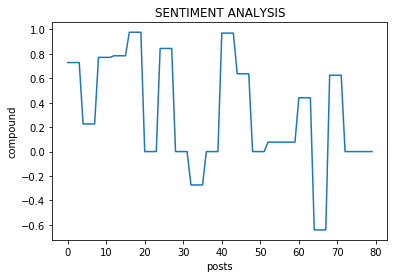

In [10]:
plt.plot(arr, label='sentiment')
plt.title('SENTIMENT ANALYSIS')
plt.ylabel('compound')
plt.xlabel('posts')